In [2]:
import sys
import os
print(os.curdir)
os.chdir('../')
import pandas as pd
from src.data import CICIDS2017
from src.data.utils import balanced_sample, encode_labels, jsonize_rows
from sklearn.model_selection import train_test_split
from src.models.API import Mistral, Gemini
from src.pipelines import TAPipeline
from src.pipelines.utils import plot_accuracies

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

.


In [ ]:
dataset = CICIDS2017(classes_mapping=False, pca=True)
dataset.load()

2025-03-11 03:34:54,948 - INFO - Loading dataset...
2025-03-11 03:34:54,948 - INFO - Downloading dataset from http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip...
2025-03-11 03:35:11,778 - INFO - c:\Users\pablo\OneDrive\Escritorio\TFG\code\data\CIC-IDS2017\MachineLearningCVE\cic_ids2017_classes_mapping(False)_pca(True).csv not found. Creating dataset from individual CSV files in c:\Users\pablo\OneDrive\Escritorio\TFG\code\data\CIC-IDS2017\MachineLearningCVE.
2025-03-11 03:36:23,233 - INFO - Starting preprocessing...
2025-03-11 03:36:23,236 - INFO - Feature names corrected.
2025-03-11 03:36:24,761 - INFO - Labels names corrected.
2025-03-11 03:36:35,162 - INFO - Duplicates dropped.
c:\Users\pablo\OneDrive\Escritorio\TFG\code\TFG\src\data\cic_ids2017.py:124: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace metho

In [16]:
data = balanced_sample(dataset.data, category_col="Label", n_per_class=20)
icl_data, test_data = train_test_split(data, test_size=0.12)
x_test = test_data.drop(columns=["Label"])
y_test = test_data["Label"]

In [4]:
chat = Gemini(model="gemini-2.0-flash-thinking-exp-01-21")
# chat = Mistral(model="open-mistral-nemo")
chat.ask("hey")

2025-03-11 03:38:30,109 - INFO - AFC is enabled with max remote calls: 10.
2025-03-11 03:38:31,391 - INFO - AFC remote call 1 is done.


{'answer': 'Hey there!  How can I help you today? 😊', 'finish_reason': 'STOP'}

2025-03-11 04:15:55,321 - INFO - Starting predictions...asking the model...
2025-03-11 04:15:55,323 - INFO - Prediction nº1...
2025-03-11 04:15:55,324 - INFO - AFC is enabled with max remote calls: 10.
2025-03-11 04:16:10,557 - INFO - AFC remote call 1 is done.
2025-03-11 04:16:10,558 - INFO - Response: FTP-Patator
2025-03-11 04:16:10,558 - INFO - Prediction nº2...
2025-03-11 04:16:10,558 - INFO - AFC is enabled with max remote calls: 10.
2025-03-11 04:16:28,224 - INFO - AFC remote call 1 is done.
2025-03-11 04:16:28,224 - INFO - Response: Bot
2025-03-11 04:16:28,226 - INFO - Prediction nº3...
2025-03-11 04:16:28,226 - INFO - AFC is enabled with max remote calls: 10.
2025-03-11 04:16:46,656 - INFO - AFC remote call 1 is done.
2025-03-11 04:16:46,657 - INFO - Response: PortScan
2025-03-11 04:16:46,657 - INFO - Prediction nº4...
2025-03-11 04:16:46,657 - INFO - AFC is enabled with max remote calls: 10.
2025-03-11 04:16:55,157 - INFO - AFC remote call 1 is done.
2025-03-11 04:16:55,158 - 

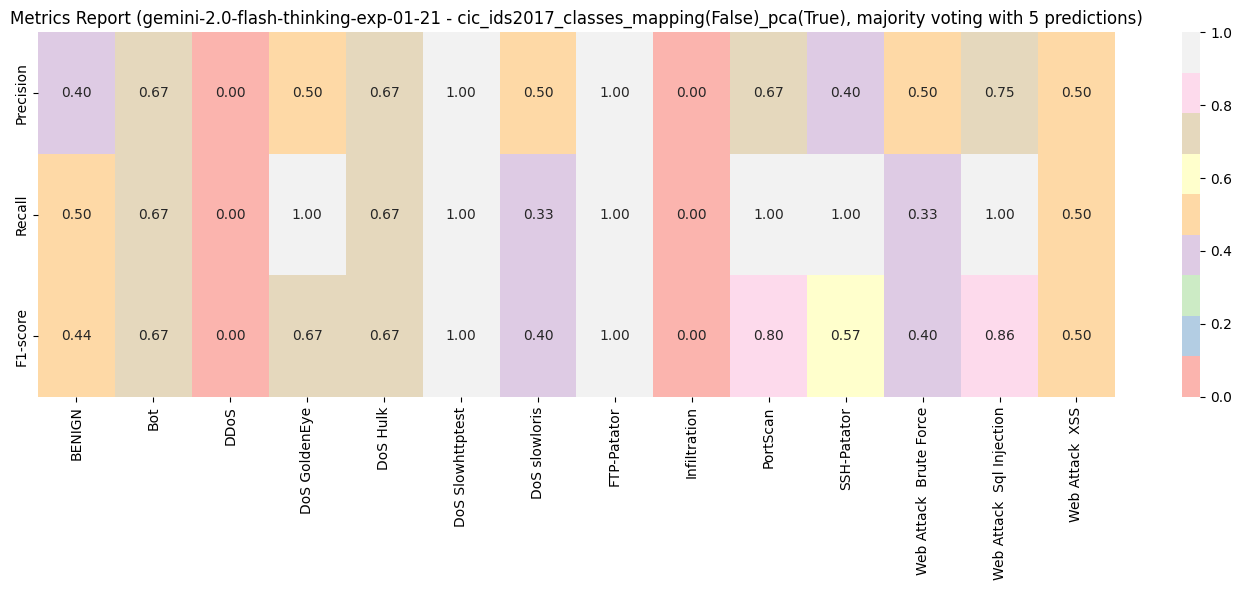

In [18]:
chat_pl = TAPipeline(chat)
chat_results = chat_pl.evaluate(
    icl_data,
    x_test,
    y_test,
    "Behaving like a Intrusion Detection System, classifing the data based on the PC features in the possible classes of attacks or not attack (BENIGN)",
    "Label",
    num_predictions=5,
    other_info=dataset._get_id()
)

In [ ]:
chat_results = chat_pl.evaluate_given_predictions(
    classifications,
    y_test
)
chat_results["accuracy"]

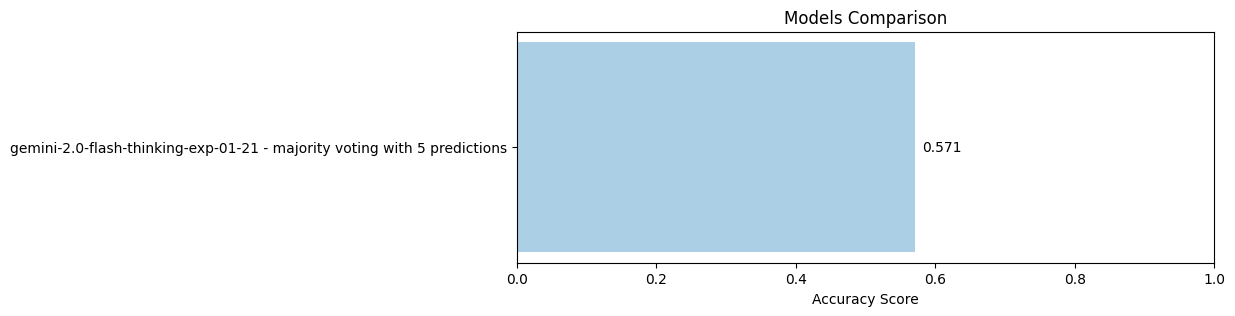

In [21]:
accuracy_plot = plot_accuracies([chat_results["accuracy"]], [chat.name + " - " + "majority voting with 5 predictions"])
# accuracy_plot = plot_accuracies([chat_results["accuracy"]], [chat.name])